# Object Detection using pre-trained Model (Transfer Learning from MobileNet)

In [8]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt

In [2]:
drawing = mp.solutions.drawing_utils
object_detector = mp.solutions.objectron


Box Landmarks present in {file}


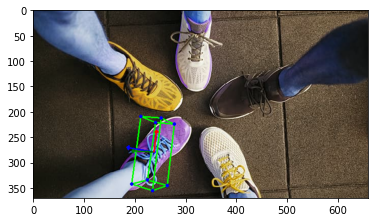

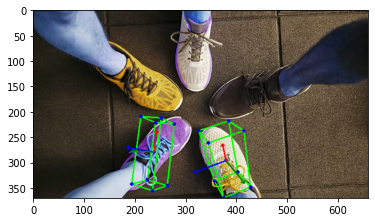

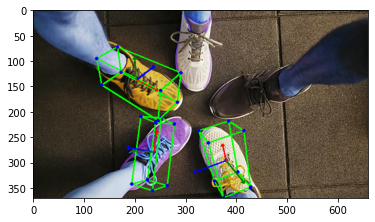

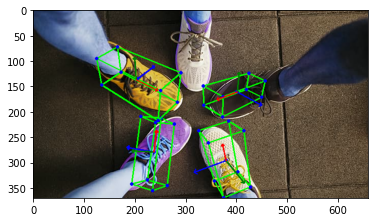

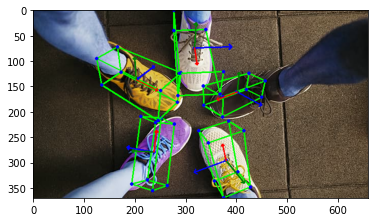

In [10]:
img_files = [r'C:\Users\R1007398\Downloads\Books_AIML\Innomatics\CV\CNN\Codes\Datasets\shoes2.jpg']
with object_detector.Objectron(static_image_mode = True, max_num_objects= 6,
                               min_detection_confidence=0.4, model_name = 'Shoe') as objectron:
    for idx, file in enumerate(img_files):
        image = cv2.imread(file)
        results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        if not results.detected_objects:
            print(f"No landmarks detected on {file}")
            continue
        print("Box Landmarks present in {file}")
        annotated_image = image.copy()
        for object_detect in results.detected_objects:
            drawing.draw_landmarks(
            annotated_image, object_detect.landmarks_2d, object_detector.BOX_CONNECTIONS)
            
            drawing.draw_axis(annotated_image, object_detect.rotation, object_detect.translation)
            plt.imshow(annotated_image)
            cv2.imwrite(r"C:\\Users\\R1007398\\Downloads\\Books_AIML\\Innomatics\\CV\\CNN\\Codes\\Datasets\\" +str(idx) + '.png', annotated_image)
            plt.show()
            
    

# For Video

In [11]:
video_path = " "
cap = cv2.VideoCapture(0)
with object_detector.Objectron(static_image_mode = False, max_num_objects= 6,
                               min_detection_confidence=0.5, min_tracking_confidence=0.99, model_name = 'Shoe') as objectron:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ingnore ---- bla bla bla")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = objectron.process(image)
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.detected_objects:
            for detected_obj in results.detected_objects:
                drawing.draw_landmarks(image, detected_obj.landmarks_2d, object_detector.BOX_CONNECTIONS)
            
                drawing.draw_axis(image, detected_obj.rotation, detected_obj.translation)
        cv2.imshow("Your video with object detection", image)
        if cv2.waitkey(5) & 0xFF == 27:
            break
cap.release()
                
        
